# 实验三 对航空公司客户价值进行聚类分析

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import  Counter

## 载入训练数据、显示读入数据的前5行

In [3]:
data=pd.read_csv(r'data/air_data.csv')

In [18]:
data.shape

(62051, 5)

In [19]:
data.head(5)

,ZL,ZR,ZF,ZM,ZC
0,1.445701,-0.944998,14.034510,26.762112,1.294939
1,1.304181,-0.911945,9.073559,13.127371,2.866311
2,1.339561,-0.889910,8.719206,12.653972,2.879075
3,0.667342,-0.416159,0.781685,12.541109,1.993551
4,0.384302,-0.922963,9.924008,13.899268,1.343695


## 训练KMeans聚类模型，把数据聚成5类

### 建立模型

In [4]:
k = 5
model = KMeans(algorithm='auto', 
               copy_x=True, 
               init='k-means++',
               max_iter=300, 
               n_clusters=k, 
               n_init=10, 
               random_state=None, 
               tol=0.0001,
               verbose=0)

### 训练模型

In [5]:
model.fit(data)

KMeans(n_clusters=5)

## 使用KMeans模型对航空公司客户价值进行聚类分析

### 查看每个聚类类别的样本数量

In [11]:
model.labels_

array([4, 4, 4, ..., 3, 1, 2])

In [12]:
Counter(model.labels_)

Counter({4: 5334, 0: 4198, 1: 15742, 3: 24638, 2: 12139})

In [63]:
model.labels_.size

62051

### 查看聚类类别

In [13]:
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['聚类类别']

In [14]:
r

,ZL,ZR,ZF,ZM,ZC,聚类类别
0,1.445701,-0.944998,14.034510,26.762112,1.294939,4
1,1.304181,-0.911945,9.073559,13.127371,2.866311,4
2,1.339561,-0.889910,8.719206,12.653972,2.879075,4
3,0.667342,-0.416159,0.781685,12.541109,1.993551,4
4,0.384302,-0.922963,9.924008,13.899268,1.343695,4
...,...,...,...,...,...,...
62046,-1.243176,1.456811,-0.706600,-0.639947,-3.903618,2
62047,-0.535577,0.685588,-0.706600,-0.768866,-3.903618,2
62048,-0.004877,-0.460229,-0.564859,-0.441962,-3.903618,3
62049,1.693361,-0.790753,-0.706600,-0.699514,-3.903618,1


### 查看聚类个数及中心点统计

In [15]:
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['类别数目']

In [16]:
r

,ZL,ZR,ZF,ZM,ZC,类别数目
0,0.052677,-0.002466,-0.227478,-0.232403,2.186510,4198
1,1.160582,-0.377320,-0.087083,-0.095125,-0.156465,15742
2,-0.314324,1.684899,-0.573915,-0.536686,-0.174784,12139
3,-0.700418,-0.415578,-0.160607,-0.160224,-0.254594,24638
4,0.484300,-0.799398,2.484044,2.425176,0.309765,5334


### 查看客户样本类别的聚类标准中心值

In [17]:
model.cluster_centers_

array([[ 5.26771391e-02, -2.46587220e-03, -2.27477521e-01,
        -2.32402629e-01,  2.18650986e+00],
       [ 1.16058165e+00, -3.77320270e-01, -8.70834939e-02,
        -9.51252296e-02, -1.56464999e-01],
       [-3.14324354e-01,  1.68489899e+00, -5.73915163e-01,
        -5.36685917e-01, -1.74783667e-01],
       [-7.00417841e-01, -4.15578488e-01, -1.60607144e-01,
        -1.60224231e-01, -2.54593856e-01],
       [ 4.84300014e-01, -7.99398310e-01,  2.48404397e+00,
         2.42517606e+00,  3.09764552e-01]])

### 每个聚类数据的密度图像

In [39]:
def density_plot(data):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    p=data.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel('密度') for i in range(5)]
    [p[i].set_title('客户群%d' %i) for i in range(5)]
    plt.legend()
    plt.show()
    return plt

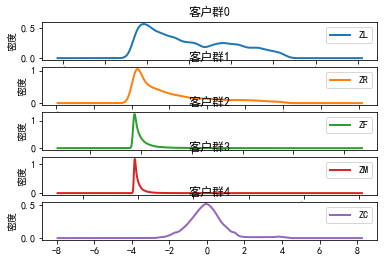

<module 'matplotlib.pyplot' from 'E:\\programSoftware\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [41]:
density_plot(data)

## 画出5个聚类中心点在每个维度上的散点图，并按统一类别把聚类中心用线连接起来

Text(0.5, 1.0, '180512206-李环宇')

Text(0.5, 0, 'ZL--ZR--ZF--ZM--ZC')

Text(0, 0.5, 'values')

<Figure size 432x540 with 0 Axes>

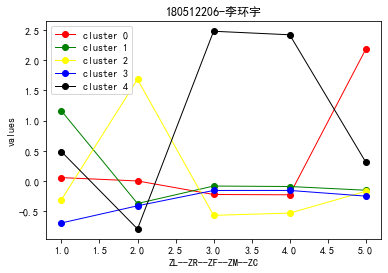

<Figure size 432x540 with 0 Axes>

In [20]:
clu = model.cluster_centers_  
x = [1,2,3,4,5]  
colors = ['red','green','yellow','blue','black'] 
plt.title("180512206-李环宇") 
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
for i in range(5):  
   plt.plot(x,clu[i],label='cluster '+str(i),linewidth=1,color=colors[i],marker='o')   
plt.legend()
plt.xlabel('ZL--ZR--ZF--ZM--ZC')  
plt.ylabel('values')  
plt.figure(figsize=(6, 7.5))
plt.show() 

## 分析聚类结果

我们重点关注的是ZL，ZF，ZM，从图中可以看到：
1、客户群4[blue] 的zF,zM很高，zL也不低，可以看做是重要保持的客户；
2、客户群3[yellow] 重要发展客户
3、客户群1[red] 重要挽留客户，原因：入会时间长，但是zF,zM较低
4、客户群2[green] 一般客户
5、客户群5[black] 低价值客户

重要保持客户：zR（最近乘坐航班）低，zF（乘坐次数）、zC（平均折扣率高，舱位较高）、zM（里程数）高。最优先的目标，进行差异化管理，提高满意度。
重要发展客户：zR低，zC高，zF或zM较低，潜在价值客户。虽然说，当前价值不高，但是却有很大的发展潜力，促使这类客户在本公司消费和合作伙伴处消费。
重要挽留客户：zC、zF、zM较高，但是较长时间没有乘坐（zR）小。增加与这类客户的互动，了解情况，采取一定手段，延长客户生命周期。
一般与低价值客户：zC、zF、zM、zL低，zR高。他们可能是在公司打折促销时才会乘坐本公司航班。

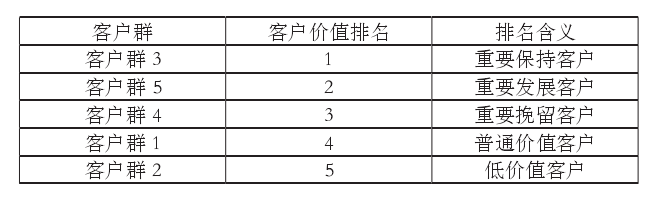